# CAPM Model:
  The Capital Asset Pricing Model (CAPM) describes the relationship        between systematic risk and expected return for assets, particularly     stocks. CAPM is widely used throughout finance for pricing risky         securities and generating expected returns for assets given the risk     of those assets and cost of capital.

  
# Prerequisites

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from yahoofinancials import YahooFinancials

In [2]:
df1 = pd.read_csv('NSEI.csv')
df1['Date'] = pd.to_datetime(df1['Date']).dt.strftime('%d/%m/%Y')
df2 = pd.read_csv('RELIANCE.NS.csv')
df2['Date'] = pd.to_datetime(df2['Date']).dt.strftime('%d/%m/%Y')

In [3]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/03/2016,7038.250000,7777.600098,7035.100098,7738.399902,7738.399902,4809600.0
1,01/04/2016,7718.049805,7992.000000,7516.850098,7849.799805,7849.799805,3538800.0
2,01/05/2016,7822.700195,8213.599609,7678.350098,8160.100098,8160.100098,4361300.0
3,01/06/2016,8179.200195,8308.150391,7927.049805,8287.750000,8287.750000,4193500.0
4,01/07/2016,8313.049805,8674.700195,8287.549805,8638.500000,8638.500000,3321700.0


In [4]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/03/2016,477.820740,523.042114,477.795959,517.692810,500.860779,143481484.0
1,01/04/2016,514.671448,529.926819,484.829315,486.736237,475.800232,161217673.0
2,01/05/2016,484.903595,492.803711,458.479065,474.427887,463.768402,137694499.0
3,01/06/2016,474.477417,492.407471,462.317688,480.024841,469.239655,120539575.0
4,01/07/2016,481.807953,514.498047,480.445862,502.685059,491.390686,107208849.0


In [5]:
df_volume = pd.DataFrame(pd.merge(df1, df2, on = 'Date')[['Date', 'Volume_x', 'Volume_y']])

# NaN values removal

In [6]:
df_volume.dropna(inplace = True)

In [7]:
df_volume.columns = ['Date', 'Market Volume', 'Stock Volume']
df_volume.head()

,Date,Market Volume,Stock Volume
0,01/03/2016,4809600.0,143481484.0
1,01/04/2016,3538800.0,161217673.0
2,01/05/2016,4361300.0,137694499.0
3,01/06/2016,4193500.0,120539575.0
4,01/07/2016,3321700.0,107208849.0


# Outlier Removal

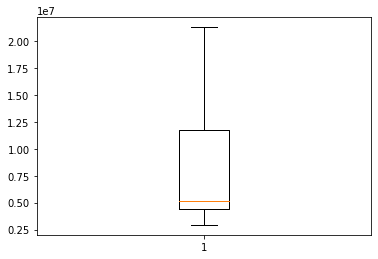

In [8]:
plt.boxplot(df_volume['Market Volume'])
plt.show()

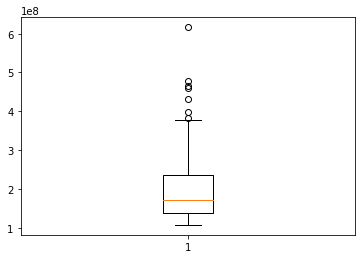

In [9]:
plt.boxplot(df_volume['Stock Volume'])
plt.show()

In [10]:
Q1 = df_volume['Market Volume'].quantile(0.25)
Q3 = df_volume['Market Volume'].quantile(0.75)
IQR = Q3 - Q1 
filter = (df_volume['Market Volume'] >= Q1 - 1.5 * IQR) & (df_volume['Market Volume'] <= Q3 + 1.5 *IQR)
df_volume = df_volume.loc[filter] 

Q1 = df_volume['Stock Volume'].quantile(0.25)
Q3 = df_volume['Stock Volume'].quantile(0.75)
IQR = Q3 - Q1 
filter = (df_volume['Stock Volume'] >= Q1 - 1.5 * IQR) & (df_volume['Stock Volume'] <= Q3 + 1.5 *IQR)
df_volume = df_volume.loc[filter] 

# Formula for calculation of market return and stock prices:

\begin{aligned} &R_n = (C_n - C_{n-1})/ C_{n-1}  \\ &\textbf{where:} \\ &R_n = \text{return in month n} \\ &C_n = \text{price in month n} \\ \end{aligned} 
​


In [11]:
df_volume['Market Volume'] = df_volume['Market Volume'].map(int)
df_volume['Stock Volume'] = df_volume['Stock Volume'].map(int)
df_returns = pd.DataFrame(columns = ['Market Returns', 'Stock Returns'])

for i in range(0, len(df_volume)-1):
    df_returns.loc[i] = [100*(df_volume.iloc[i+1, 1] - df_volume.iloc[i, 1])/df_volume.iloc[i, 1], 100*(df_volume.iloc[i+1, 2] - df_volume.iloc[i, 2])/df_volume.iloc[i, 2]]

In [12]:
df_returns.head()

,Market Returns,Stock Returns
0,-26.422156,12.361309
1,23.242342,-14.590940
2,-3.847477,-12.458685
3,-20.789317,-11.059211
4,15.184996,16.431693


# Calculation using regression:
The formula for calculating the expected return of an asset given its risk is as follows:

\begin{aligned} &ER_i = R_f + \beta_i ( ER_m - R_f ) \\ &\textbf{where:} \\ &ER_i = \text{stock return} \\ &R_f = \text{risk-free rate} \\ &R_m = \text{market return}\\ &\beta_i = \text{beta of the investment} \\ &(ER_m - R_f) = \text{market risk premium} \\ \end{aligned} 
​
​Each of these variables can be thought of using the slope-intercept framework where Re = y, B = slope, (Rm – Rf) = x, and Rf = y-intercept. Important insights to be gained from this framework are:

1. An asset is expected to generate at least the risk-free rate of return.
2. If the Beta of an individual stock or portfolio equals 1, then the return of the asset equals the average market return.
3. The Beta coefficient represents the slope of the line of best fit for each Re – Rf (y) and Rm – Rf (x) excess return pair.




 

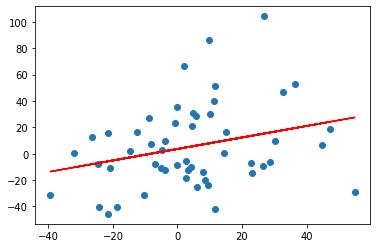

In [13]:
X = df_returns['Market Returns'].values.reshape(-1, 1)
y = df_returns['Stock Returns'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
y_pred = linear_regressor.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [14]:
print('Beta = ', linear_regressor.coef_[0][0], '\nIntercept = ', linear_regressor.intercept_[0])

Beta =  0.43540585299822576 
Intercept =  3.5812209583696015


In the graph above, we plotted excess stock returns over excess market returns to find the line of best fit. However, we observe that this stock has a positive intercept value after accounting for the risk-free rate. This value represents Alpha, or the additional return expected from the stock when the market return is zero.

# Calculation with covariance and variance (market):
\begin{aligned} &\beta_i = Covariance(R_e,R_m)/Variance(R_m) \\ \end{aligned}

One of the most popular uses of Beta is to estimate the cost of equity (Re) in valuation models. The CAPM estimates an asset’s Beta based on a single factor, which is the systematic risk of the market. The cost of equity derived by the CAPM reflects a reality in which most investors have diversified portfolios from which unsystematic risk has been successfully diversified away.

​

In [15]:
cov = np.cov(np.array([df_returns['Market Returns'], df_returns['Stock Returns']]))
var = np.var(df_returns['Market Returns'])

print('Covariance Matrix : \n\n', cov, '\n\nVariance (Market Returns : )', var)

Covariance Matrix : 

 [[419.01654633 182.44225678]
 [182.44225678 999.09227198]] 

Variance (Market Returns : ) 410.958535827895


In [16]:
beta = int(cov[0][1])/var
print(beta)

0.4428670635429255


# Advantages of the CAPM:
The CAPM has several advantages over other methods of calculating required return, explaining why it has been popular for more than 40 years:

1. It considers only systematic risk, reflecting a reality in which most investors have diversified portfolios from which unsystematic risk has been essentially eliminated.
2. It is a theoretically-derived relationship between required return and systematic risk which has been subject to frequent empirical research and testing.
3. It is generally seen as a much better method of calculating the cost of equity than the dividend growth model (DGM) in that it explicitly considers a company’s level of systematic risk relative to the stock market as a whole.
4. It is clearly superior to the WACC in providing discount rates for use in investment appraisal

In [ ]:
# Disadvantages of CAPM:
1. Too Many Assumptions:
The CAPM model is based on too many assumptions, which many criticize as being unrealistic. Therefore, it may not provide the correct results.

2. Assigning Values to CAPM Variables:
Risk-free Rate (Rf): The commonly accepted rate used as the Rf is the yield on short-term government securities. The problem with using this input is that the yield changes daily, creating volatility.

3. Ability to Borrow at Risk-free Rate
There are four major assumptions of CAPM. One of the assumptions is that investor can borrow & lend the funds at the risk-free rate. This assumption is unrealistic for the real world. The individual investors are unable to borrow or lend at the same return as the US government.

4. Determination of Project Proxy Beta
The problem may arise in using the CAPM to calculate a project-specific discount rate. Generally, equity beta & portfolio/investment beta are different. Therefore, the company needs to find a proxy beta for the project.

# Automatic beta Calculation for any Stock:

In [17]:
start_date = str(input("Start Date (YYYY-MM-DD) : "))
end_date = str(input("End Date (YYYY-MM-DD) : "))
frequency_date = str(input("Frequency : "))
stock = str(input("Stock Name : "))

Start Date (YYYY-MM-DD) : 2016-03-01
End Date (YYYY-MM-DD) : 2021-03-01
Frequency : monthly
Stock Name : RELIANCE.NS


# Using Yahoo Financials module:
A powerful financial data module used for pulling fundamental and technical stock data from Yahoo Finance

We have used the NIFTY 50 index to retrieve the stock data

In [18]:
yf1 = YahooFinancials('^NSEI')
yf1_data = yf1.get_historical_price_data(start_date = start_date, end_date = end_date, time_interval = frequency_date)
df1 = pd.DataFrame(yf1_data['^NSEI']['prices'])
df1 = df1.drop('date', axis=1).rename(columns={'formatted_date': 'Date'})

yf2 = YahooFinancials(stock)
yf2_data = yf2.get_historical_price_data(start_date = start_date, end_date = end_date, time_interval = frequency_date)
df2 = pd.DataFrame(yf2_data[stock]['prices'])
df2 = df2.drop('date', axis=1).rename(columns={'formatted_date': 'Date'})

# Calculation of beta using regression:

In [19]:
def calc_beta(df1, df2):
    df_volume = pd.DataFrame(pd.merge(df1, df2, on = 'Date')[['Date', 'volume_x', 'volume_y']])
    df_volume.dropna(inplace = True)
    df_volume.columns = ['Date', 'Market Volume', 'Stock Volume']
    
    Q1 = df_volume['Market Volume'].quantile(0.25)
    Q3 = df_volume['Market Volume'].quantile(0.75)
    IQR = Q3 - Q1 
    filter = (df_volume['Market Volume'] >= Q1 - 1.5 * IQR) & (df_volume['Market Volume'] <= Q3 + 1.5 *IQR)
    df_volume = df_volume.loc[filter] 

    Q1 = df_volume['Stock Volume'].quantile(0.25)
    Q3 = df_volume['Stock Volume'].quantile(0.75)
    IQR = Q3 - Q1 
    filter = (df_volume['Stock Volume'] >= Q1 - 1.5 * IQR) & (df_volume['Stock Volume'] <= Q3 + 1.5 *IQR)
    df_volume = df_volume.loc[filter] 
    
    df_volume['Market Volume'] = df_volume['Market Volume'].map(int)
    df_volume['Stock Volume'] = df_volume['Stock Volume'].map(int)
    df_returns = pd.DataFrame(columns = ['Market Returns', 'Stock Returns'])

    for i in range(0, len(df_volume)-1):
        df_returns.loc[i] = [100*(df_volume.iloc[i+1, 1] - df_volume.iloc[i, 1])/df_volume.iloc[i, 1], 100*(df_volume.iloc[i+1, 2] - df_volume.iloc[i, 2])/df_volume.iloc[i, 2]]

    X = df_returns['Market Returns'].values.reshape(-1, 1)
    y = df_returns['Stock Returns'].values.reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, y)
    y_pred = linear_regressor.predict(X)
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.show()
    
    print('Beta = ', linear_regressor.coef_[0][0], '\nIntercept = ', linear_regressor.intercept_[0])
    
    cov = np.cov(np.array([df_returns['Market Returns'], df_returns['Stock Returns']]))
    var = np.var(df_returns['Market Returns'])

    print('\nCovariance Matrix : \n\n', cov, '\n\nVariance (Market Returns) : ', var)
    
    beta = int(cov[0][1])/var
    print('\nbeta ',beta)

# Alpha:
1. Alpha is the excess return on an investment after adjusting for market-related volatility and random fluctuations. Alpha is one of the five major risk management indicators for mutual funds, stocks, and bonds. In a sense, it tells investors whether an asset has consistently performed better or worse than its beta predicts.

2. Alpha is also a measure of risk. An alpha of -15 means the investment was far too risky given the return. An alpha of zero suggests that an asset has earned a return commensurate with the risk. Alpha of greater than zero means an investment outperformed, after adjusting for volatility.

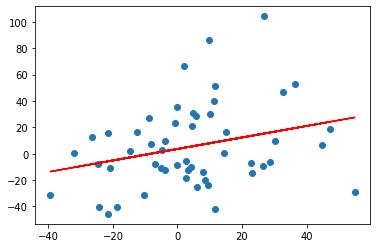

Beta =  0.43540585299822576 
Intercept =  3.5812209583696015

Covariance Matrix : 

 [[419.01654633 182.44225678]
 [182.44225678 999.09227198]] 

Variance (Market Returns) :  410.958535827895

beta  0.4428670635429255


In [21]:
calc_beta(df1, df2)

Alpha is greater than 0 which implies that the given security is outperforming the market.

# Beta values:
A Beta greater than 1 indicates that the security's price will be more volatile than the market and finally, a Beta less than 1 means that it will be less volatile than the market.

<b>Beta values can be roughly characterized as follows:</b>

1. b Less than 0: Negative Beta is possible but not likely. People thought gold stocks should have negative Betas but that hasn't been true.
<br>
<br>
2. b Equal to 0: Cash under your mattress, assuming no inflation!
<br>
<br>
3. b Between 0 and 1: Low-volatility investments (e.g., utility stocks).
<br>
<br>
4. b Equal to 1: Matching the index.
<br>
<br>
5. b Greater than 1: Anything more volatile than the index.
<br>
<br>
6. b Much Greater than 1: Impossible, because the stock would be expected to go to zero on any market decline.

Beta value of stock of reliance lies between 0 and 1, thus we can conclude that 
##### Price of reliance stock is less volatile then the market. 